In [32]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Loading the csv file and assigning name d1 for it
d1=pd.read_csv("ratings project.csv")
d1

,Unnamed: 0,Rating,Review
0,0,1 star,Large quality display with decent performance
1,1,1 star,Good product from lenovo
2,2,1 star,"Good laptop, but the screen resolution is not ..."
3,3,1 star,"Good laptop, but the screen resolution is not ..."
4,4,4 star,DONT BUY !
...,...,...,...
19995,19995,1 star,Worth every penny
19996,19996,1 star,Very comfortable but poor sound
19997,19997,1 star,Horrible product
19998,19998,1 star,Worth the shot ( except for long wire)


In [34]:
#Removing unwanted columns
d1.drop('Unnamed: 0',axis=1,inplace=True)
d1.head()

,Rating,Review
0,1 star,Large quality display with decent performance
1,1 star,Good product from lenovo
2,1 star,"Good laptop, but the screen resolution is not ..."
3,1 star,"Good laptop, but the screen resolution is not ..."
4,4 star,DONT BUY !


In [35]:
#Checking the number of rows and columns in our dataset
d1.shape

(20000, 2)

There are 20000 rows and 2 columns in our dataset

In [36]:
#checking the information about each column
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  20000 non-null  object
 1   Review  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


#There are no null values in our dataset.Both the ratings and review columns are object datatype

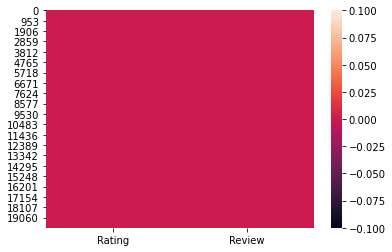

In [37]:
sns.heatmap(d1.isnull())

In [38]:
#Checking the value counts
d1.Rating.value_counts()

2 star    4000
5 star    4000
1 star    4000
4 star    4000
3 star    4000
Name: Rating, dtype: int64

#All the stars contains 4000 datas each

In [39]:
d1["Rating"].replace("5 star","5",inplace=True)
d1["Rating"].replace("4 star","4",inplace=True)
d1["Rating"].replace("3 star","3",inplace=True)
d1["Rating"].replace("2 star","2",inplace=True)
d1["Rating"].replace("1 star","1",inplace=True)
d1.head()

,Rating,Review
0,1,Large quality display with decent performance
1,1,Good product from lenovo
2,1,"Good laptop, but the screen resolution is not ..."
3,1,"Good laptop, but the screen resolution is not ..."
4,4,DONT BUY !


In [59]:
d1['Rating']=d1['Rating'].astype(str).astype(int)
print (d1.dtypes)

Rating           int32
Review          object
length           int64
clean_length     int64
dtype: object


Converting string datatype of rating column to integer

In [61]:
#checking the number of null values in each column
d1.isnull().sum()

Rating          0
Review          0
length          0
clean_length    0
dtype: int64

#There are no null values in our dataset

In [43]:
#adding new column for length of news
d1['length']=d1.Review.str.len()
d1.head(5)

,Rating,Review,length
0,1,Large quality display with decent performance,45
1,1,Good product from lenovo,24
2,1,"Good laptop, but the screen resolution is not ...",51
3,1,"Good laptop, but the screen resolution is not ...",51
4,4,DONT BUY !,10


In [44]:
#describing labels
d1.groupby('Rating').describe()

length                                                   
         count      mean        std  min   25%   50%   75%    max
Rating                                                           
1       4000.0  21.77825  17.940444  1.0  10.0  14.5  28.0  100.0
2       4000.0  22.06775  18.811542  1.0   9.0  15.0  29.0  122.0
3       4000.0  21.20150  19.239047  1.0   9.0  14.0  30.0  100.0
4       4000.0  27.40900  18.886421  1.0  13.0  21.0  38.0  100.0
5       4000.0  32.47875  19.803638  1.0  17.0  29.0  43.0  100.0

# CLEANING THE DATA

In [45]:
#converting reviews to lower case
d1['Review']=d1['Review'].str.lower()
d1.head(5)

,Rating,Review,length
0,1,large quality display with decent performance,45
1,1,good product from lenovo,24
2,1,"good laptop, but the screen resolution is not ...",51
3,1,"good laptop, but the screen resolution is not ...",51
4,4,dont buy !,10


In [46]:
#replace email address with 'email'
d1['Review']=d1['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
d1['Review']=d1['Review'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
d1['Review']=d1['Review'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
d1['Review']=d1['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
d1['Review']=d1['Review'].str.replace(r'\d+(\.\d+)?','number')

In [47]:
#remove punctuation
d1['Review']=d1['Review'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
d1['Review']=d1['Review'].str.replace(r'\s+',' ')

#remove leadin and training white space
d1['Review']=d1['Review'].str.replace(r'^\s+|\s+?$',' ')


In [48]:
d1.head(10)

,Rating,Review,length
0,1,large quality display with decent performance,45
1,1,good product from lenovo,24
2,1,good laptop but the screen resolution is not g...,51
3,1,good laptop but the screen resolution is not g...,51
4,4,dont buy,10
5,4,excellent,9
6,4,light weight and good battery time,34
7,3,good not excellent not for games,32
8,3,hp should review this laptop again worst product,49
9,4,not happy with amazon and seller return policy...,51


In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
### Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(d1)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', d1['Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [51]:
corpus

['larg qualiti display decent perform',
 'good product lenovo',
 'good laptop screen resolut great',
 'good laptop screen resolut great',
 'dont buy',
 'excel',
 'light weight good batteri time',
 'good excel game',
 'hp review laptop worst product',
 'happi amazon seller return polici',
 'pathet product',
 'good laptop',
 'ok except display',
 'turn disast initi faulti product',
 'bad product',
 'good basic laptop wide screen',
 'valu money comput user',
 'batteri capac nice audio dolbi number nice speaker',
 'good product',
 'accessori avail box',
 'laptop bag miss',
 'worth',
 'good',
 'work price',
 'look use item',
 'look use item',
 'pleas buy bad',
 'nice laptop',
 'nice laptop',
 'acer great unless upgrad ram',
 'ok',
 'low qualiti product',
 'ok product',
 'good product',
 'could better term perform',
 'money wast',
 'work also visit hp servic center',
 'good laptop latest featur pack',
 'could better',
 'charger issu',
 'charger issu',
 'buy laptop onlin',
 'love',
 'budget f

In [52]:
#New column for length after removal of stopwords
d1['clean_length']=d1.Review.str.len()
d1.head(10)

,Rating,Review,length,clean_length
0,1,large quality display with decent performance,45,45
1,1,good product from lenovo,24,24
2,1,good laptop but the screen resolution is not g...,51,50
3,1,good laptop but the screen resolution is not g...,51,50
4,4,dont buy,10,9
5,4,excellent,9,9
6,4,light weight and good battery time,34,34
7,3,good not excellent not for games,32,32
8,3,hp should review this laptop again worst product,49,49
9,4,not happy with amazon and seller return policy...,51,51


In [53]:
#total length removal
print('original length',d1.length.sum())
print('clean length',d1.clean_length.sum())

original length 499741
clean length 501891


#Here we can see the diiference of review lengths before and after cleaning

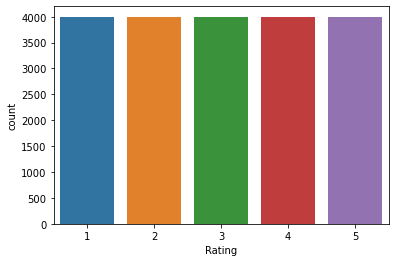

In [54]:
sns.countplot(d1["Rating"])

#all the ratings have 4000 datas each

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7477FD760>,
      dtype=object)

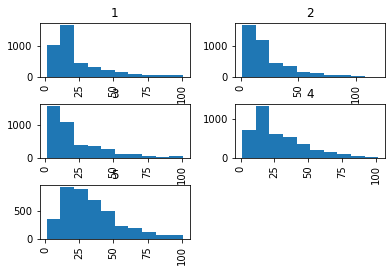

In [55]:
#Number of characters present in each rating
d1['Review'].str.len().hist(by=d1['Rating'])

In [63]:
#adding a new column named label
d1['label']=0

adding a new column named label to classify review as good and bad based on ratings.Ratings>3 is represented as good reviews and are given 1 value.ratings below 3 are bad reviews and are represented as 0

In [64]:
for i in range(len(d1['Rating'])):
    if d1['Rating'][i]>3:
        d1['label'][i]=1
    else:
        d1['label'][i]=0

In [65]:
d1.head(10)

,Rating,Review,length,clean_length,label
0,1,large quality display with decent performance,45,45,0
1,1,good product from lenovo,24,24,0
2,1,good laptop but the screen resolution is not g...,51,50,0
3,1,good laptop but the screen resolution is not g...,51,50,0
4,4,dont buy,10,9,1
5,4,excellent,9,9,1
6,4,light weight and good battery time,34,34,1
7,3,good not excellent not for games,32,32,0
8,3,hp should review this laptop again worst product,49,49,0
9,4,not happy with amazon and seller return policy...,51,51,1


In [ ]:
pip install wordcloud

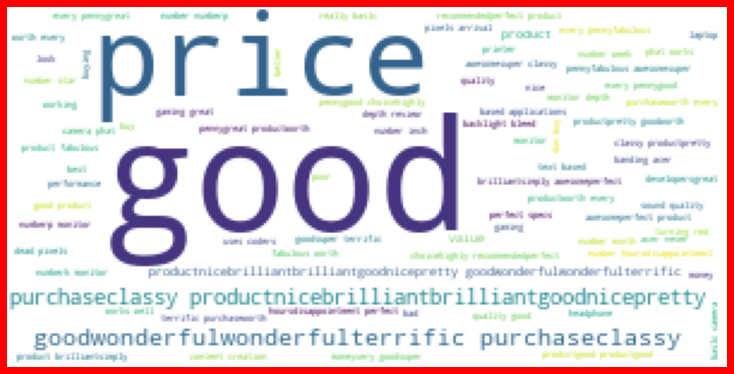

In [68]:
#loud words in good Reviews
from wordcloud import WordCloud

good=d1['Review'][d1['Rating']>=3]
good_cloud=WordCloud(width=300,height=150,min_word_length=3,background_color='white',max_words=100).generate(''.join(good))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(good_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

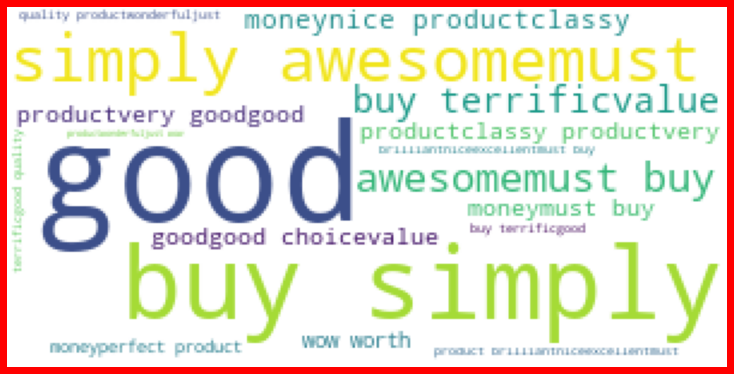

In [69]:
#loud words in bad reviews

bad=d1['Review'][d1['Rating']<3]
bad_cloud=WordCloud(width=300,height=150,min_word_length=3,background_color='white',max_words=100).generate(''.join(bad))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(bad_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

CONVERTING TEXT INTO VECTORS AND SPLITTING FEATURES AND RATING

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(d1['Review'])

x=features
y=d1['Rating']

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 94 is 0.49613636363636365


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=94)

In [75]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.45886363636363636
[[471  73  75  79 194]
 [131 271 140 116 188]
 [101  44 424 112 198]
 [121  71  70 328 287]
 [132  45  50 154 525]]
              precision    recall  f1-score   support

           1       0.49      0.53      0.51       892
           2       0.54      0.32      0.40       846
           3       0.56      0.48      0.52       879
           4       0.42      0.37      0.39       877
           5       0.38      0.58      0.46       906

    accuracy                           0.46      4400
   macro avg       0.48      0.46      0.46      4400
weighted avg       0.48      0.46      0.46      4400



In [76]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4990909090909091
[[530  21  67  62 212]
 [150 220 145 130 201]
 [ 44  36 470 119 210]
 [ 88  55  79 367 288]
 [ 77  28  50 142 609]]
              precision    recall  f1-score   support

           1       0.60      0.59      0.60       892
           2       0.61      0.26      0.36       846
           3       0.58      0.53      0.56       879
           4       0.45      0.42      0.43       877
           5       0.40      0.67      0.50       906

    accuracy                           0.50      4400
   macro avg       0.53      0.50      0.49      4400
weighted avg       0.53      0.50      0.49      4400



In [77]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.49863636363636366
[[539  23  72  60 198]
 [154 225 151 118 198]
 [ 43  38 472 103 223]
 [ 81  60  83 360 293]
 [ 79  36  57 136 598]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60       892
           2       0.59      0.27      0.37       846
           3       0.57      0.54      0.55       879
           4       0.46      0.41      0.44       877
           5       0.40      0.66      0.50       906

    accuracy                           0.50      4400
   macro avg       0.52      0.50      0.49      4400
weighted avg       0.52      0.50      0.49      4400



In [78]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.49863636363636366
[[539  23  72  60 198]
 [154 225 151 118 198]
 [ 43  38 472 103 223]
 [ 81  60  83 360 293]
 [ 79  36  57 136 598]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60       892
           2       0.59      0.27      0.37       846
           3       0.57      0.54      0.55       879
           4       0.46      0.41      0.44       877
           5       0.40      0.66      0.50       906

    accuracy                           0.50      4400
   macro avg       0.52      0.50      0.49      4400
weighted avg       0.52      0.50      0.49      4400



In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.49613636363636365
[[597  28  71  50 146]
 [169 248 166 108 155]
 [ 62  61 483 113 160]
 [120  95 100 344 218]
 [113  68  75 139 511]]
              precision    recall  f1-score   support

           1       0.56      0.67      0.61       892
           2       0.50      0.29      0.37       846
           3       0.54      0.55      0.54       879
           4       0.46      0.39      0.42       877
           5       0.43      0.56      0.49       906

    accuracy                           0.50      4400
   macro avg       0.50      0.49      0.49      4400
weighted avg       0.50      0.50      0.49      4400



In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.41363636363636364
[[515 134  68  70 105]
 [201 321 129 106  89]
 [118 158 397 114  92]
 [201 134 110 297 135]
 [263  99  82 172 290]]
              precision    recall  f1-score   support

           1       0.40      0.58      0.47       892
           2       0.38      0.38      0.38       846
           3       0.51      0.45      0.48       879
           4       0.39      0.34      0.36       877
           5       0.41      0.32      0.36       906

    accuracy                           0.41      4400
   macro avg       0.42      0.41      0.41      4400
weighted avg       0.42      0.41      0.41      4400



In [81]:
#Random forest classifier
Afrom sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=94)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

score: 0.5942948717948718


Accuracy score : 0.49727272727272726
[[523  69  70  57 173]
 [118 289 153 120 166]
 [ 47  57 471 112 192]
 [ 99  78  92 365 243]
 [100  49  61 156 540]]
              precision    recall  f1-score   support

           1       0.59      0.59      0.59       892
           2       0.53      0.34      0.42       846
           3       0.56      0.54      0.55       879
           4       0.45      0.42      0.43       877
           5       0.41      0.60      0.49       906

    accuracy                           0.50      4400
   macro avg       0.51      0.50      0.49      4400
weighted avg       0.51      0.50      0.49      4400



In [82]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
score=cross_val_score(rf,x,y,cv=5)
print("score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

score: [0.28875 0.22475 0.42775 0.508   0.492  ]
Mean score: 0.38825000000000004
Standard deviation: 0.11251388803165589


In [83]:
#saving randomforest classifier

import joblib
joblib.dump(rf,'rf_ratings.pkl')

['rf_ratings.pkl']